In [116]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [176]:
df = pd.read_csv(r"C:\Users\anami\Downloads\marketing_data.csv")

In [177]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [179]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
df.shape

(2240, 28)

In [181]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [182]:


# Cleaning the data
import numpy as np

tqdm.pandas()

# Remove leading/trailing spaces from column names
df.columns = [col.strip() for col in df.columns]

# Convert 'Income' to numeric, removing any non-numeric characters
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# Fill missing values in 'Income' with the median income
df['Income'].fillna(df['Income'].median(), inplace=True)



In [183]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [184]:
df.duplicated().sum()

0

In [191]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2240.0,52237.975446,1730.0,35538.75,51381.5,68289.75,666666.0,25037.955891
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [192]:
df.Marital_Status.value_counts()

Marital_Status
Married     867
Together    580
Single      480
Divorced    232
Widow        77
Other         4
Name: count, dtype: int64

In [193]:
df.Marital_Status.replace(['YOLO', 'Absurd'], 'Other', inplace=True)

In [194]:
df.Marital_Status.replace('Alone', 'Married', inplace=True)

In [195]:
df.Income.value_counts()

Income
51381.5    24
7500.0     12
35860.0     4
80134.0     3
63841.0     3
           ..
46086.0     1
42243.0     1
35788.0     1
36026.0     1
94871.0     1
Name: count, Length: 1975, dtype: int64

In [196]:
df.Income = df.Income.str.replace('$', '').str.replace(',', '')
df.Income = pd.to_numeric(df.Income)

AttributeError: Can only use .str accessor with string values!

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [198]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [200]:
def dist(col, bins='auto'):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, bins=bins, color='darkblue', kde=True)
    plt.title(f"{col} Distribution", fontsize=14)
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Frequnecy", fontsize=10)
    plt.show()

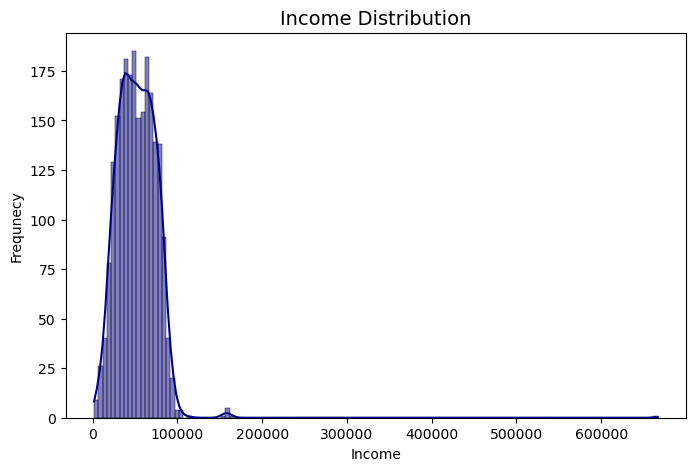

In [201]:
dist('Income')

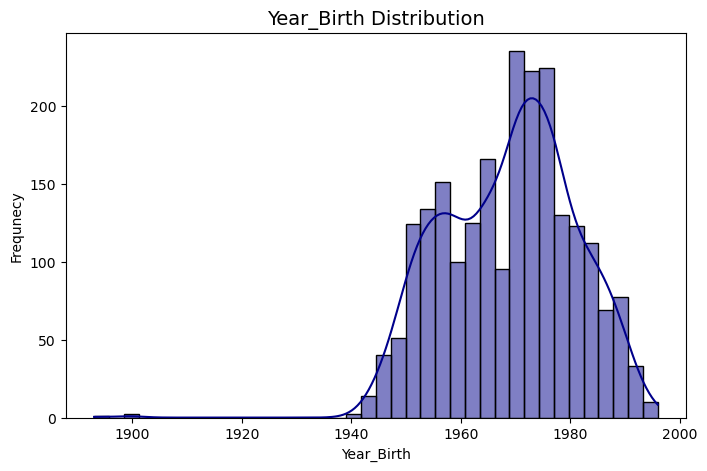

In [202]:
dist('Year_Birth')

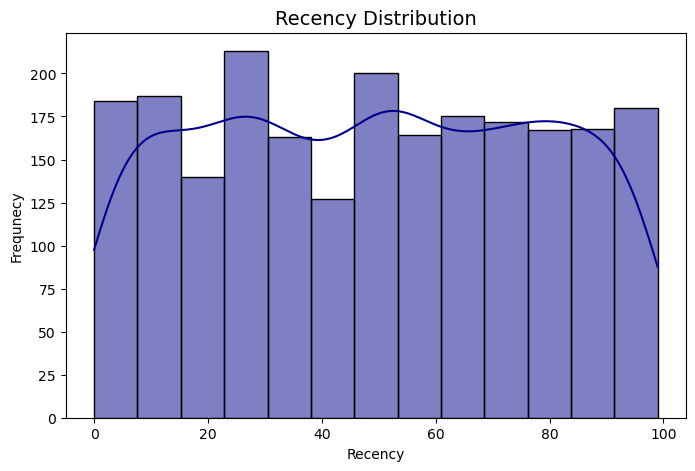

In [203]:
dist('Recency')

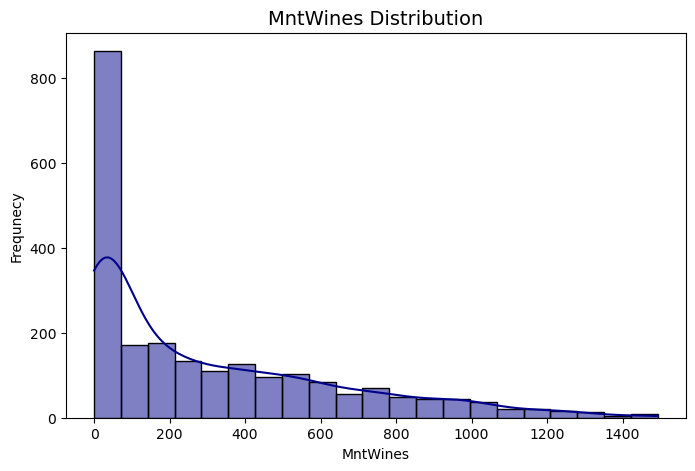

In [204]:
dist('MntWines')

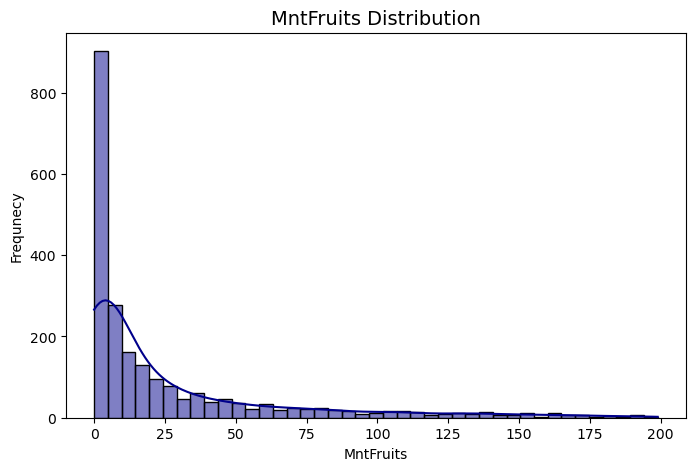

In [205]:
dist('MntFruits')

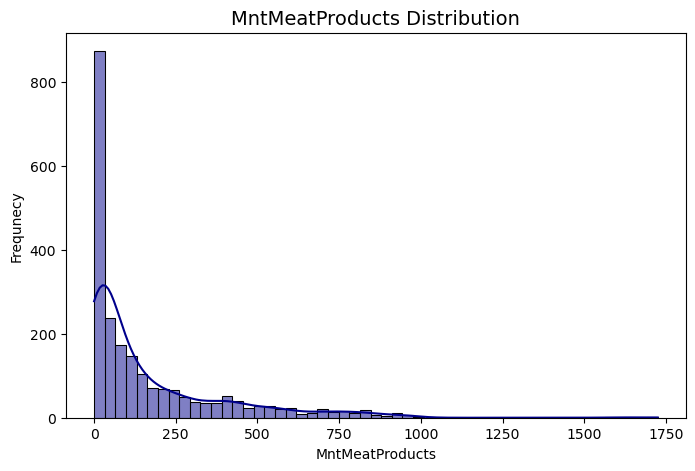

In [206]:
dist('MntMeatProducts')

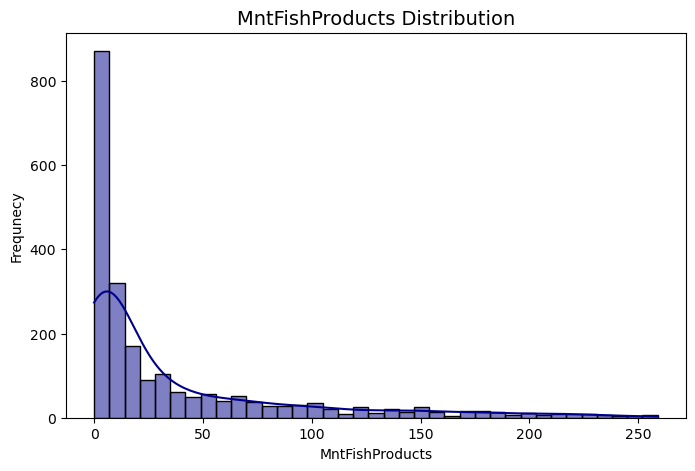

In [207]:
dist('MntFishProducts')

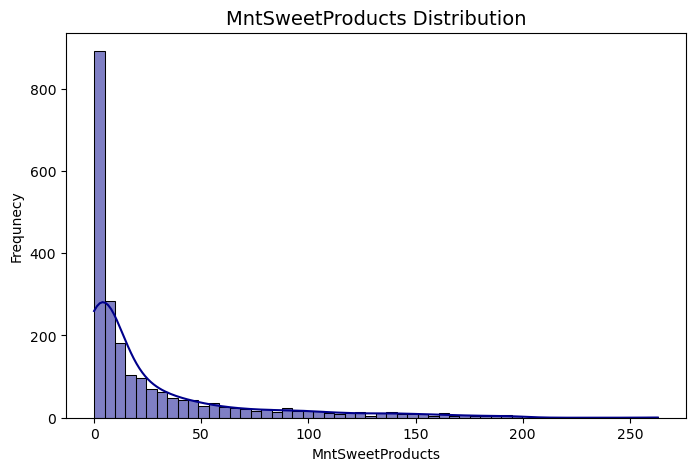

In [208]:
dist('MntSweetProducts')

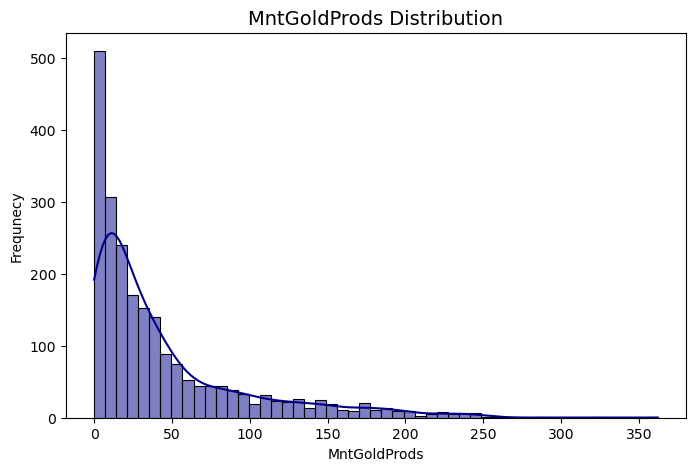

In [209]:
dist('MntGoldProds')

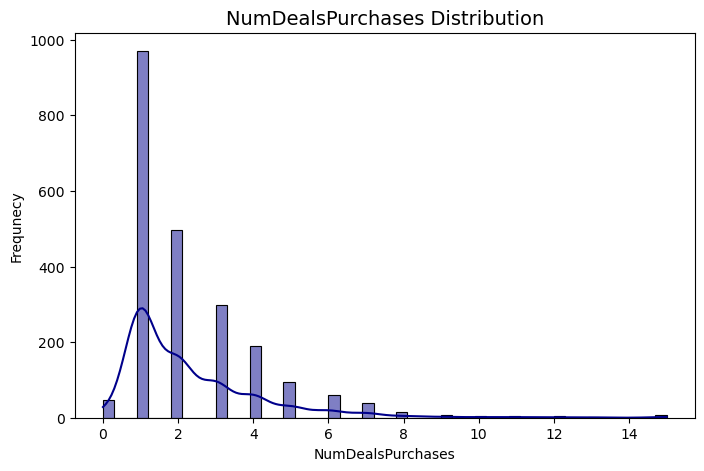

In [210]:
dist('NumDealsPurchases')

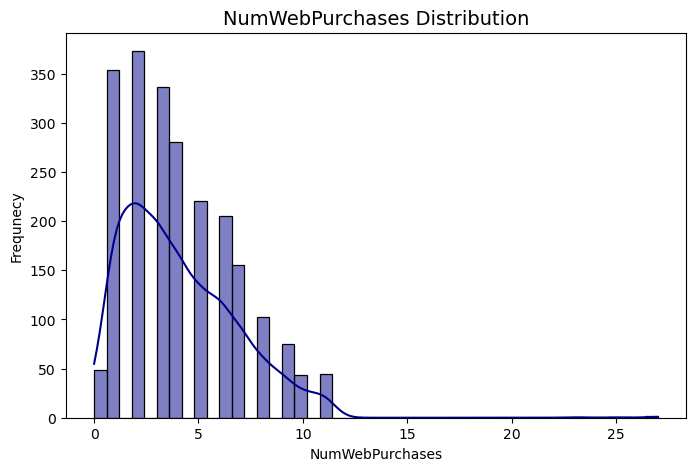

In [211]:
dist('NumWebPurchases')

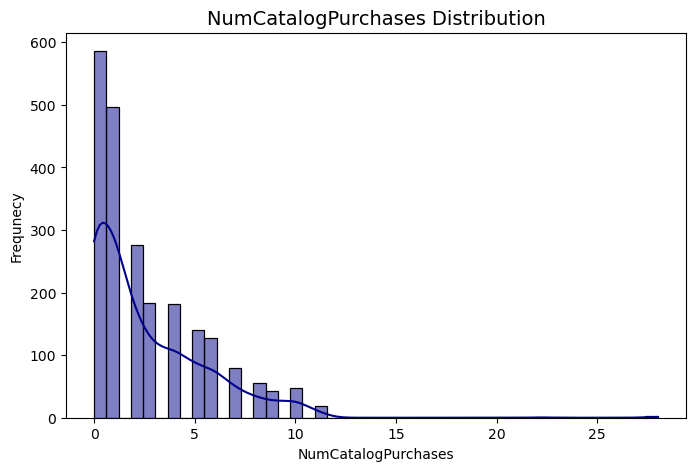

In [212]:
dist('NumCatalogPurchases')

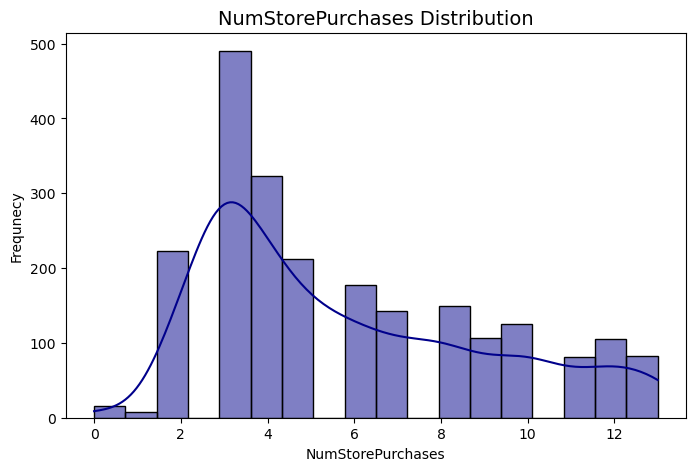

In [213]:
dist('NumStorePurchases')

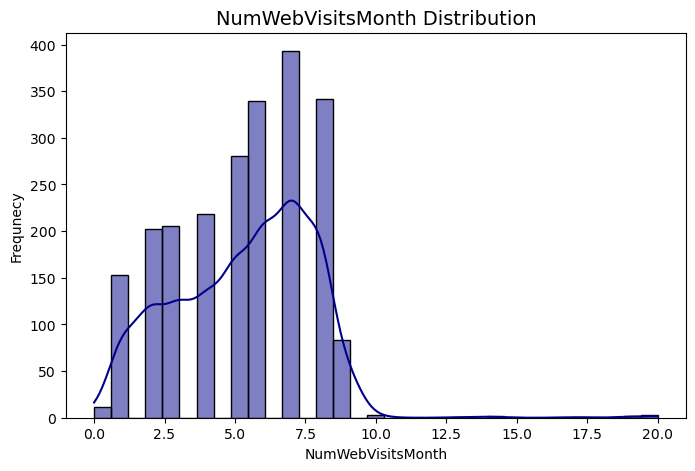

In [214]:
dist('NumWebVisitsMonth')

In [215]:
def countplot(col):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='dark')
    plt.title(f"{col} Countplot", fontsize=14)
    plt.xlabel(f"{col}", fontsize=10)
    plt.ylabel("Frequnecy", fontsize=10)
    plt.show()

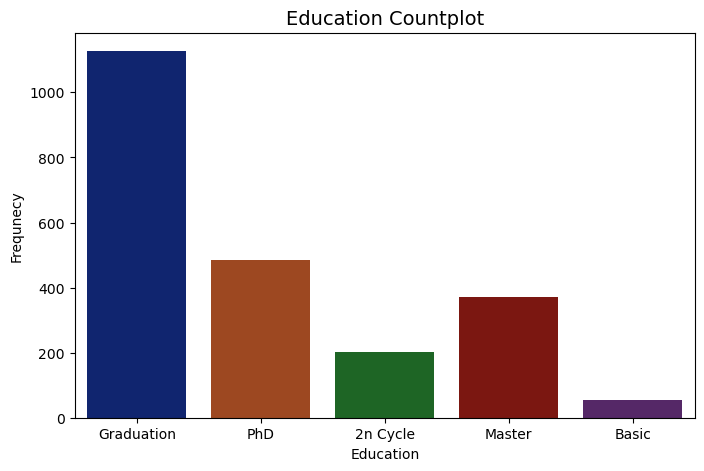

In [216]:
countplot("Education")

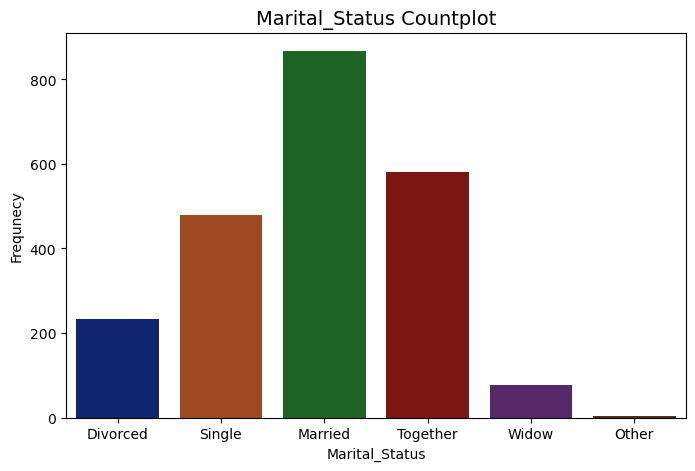

In [217]:
countplot('Marital_Status')

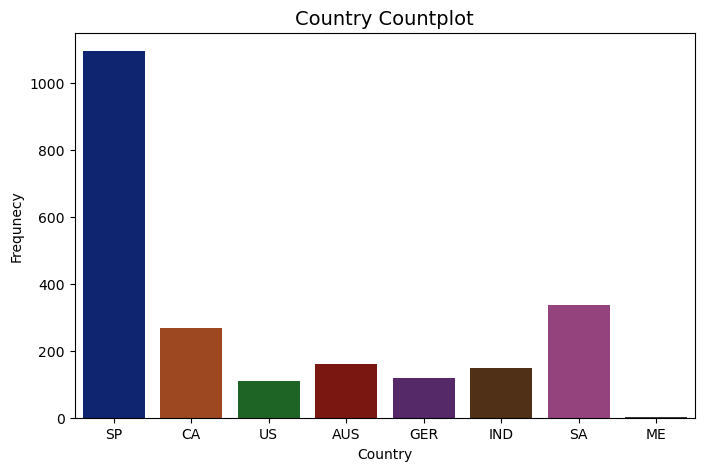

In [218]:
countplot('Country')

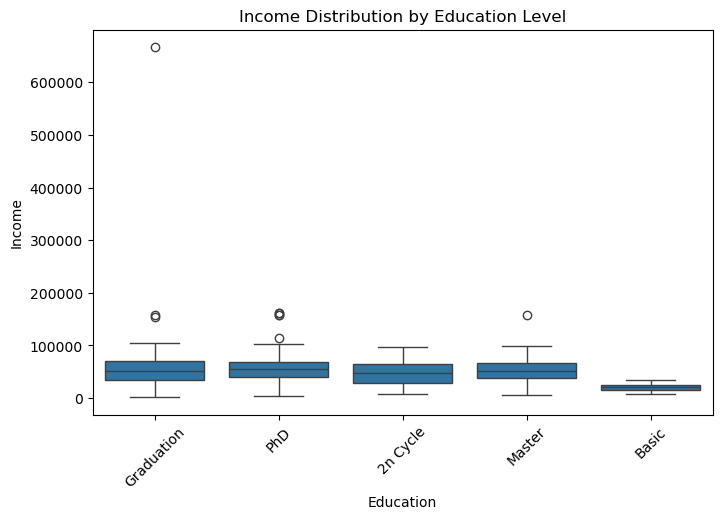

In [219]:
plt.figure(figsize=(8 ,5))
sns.boxplot(x='Education', y='Income', data=df)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education Level')
plt.show()

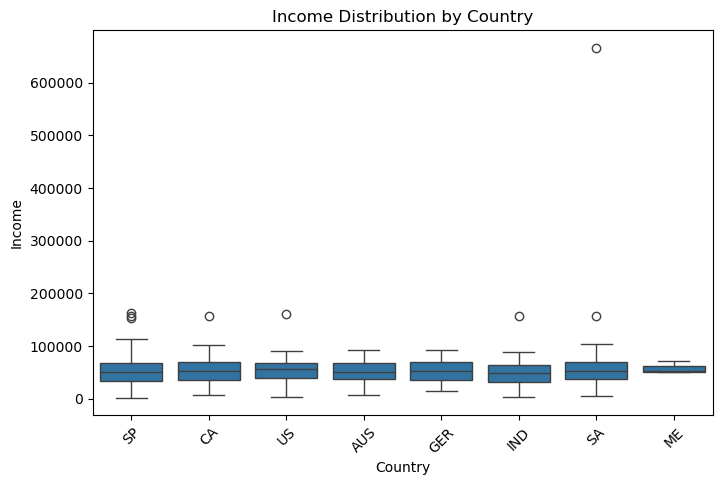

In [220]:
plt.figure(figsize=(8 ,5))
sns.boxplot(x='Country', y='Income', data=df)
plt.xticks(rotation=45)
plt.title('Income Distribution by Country')
plt.show()

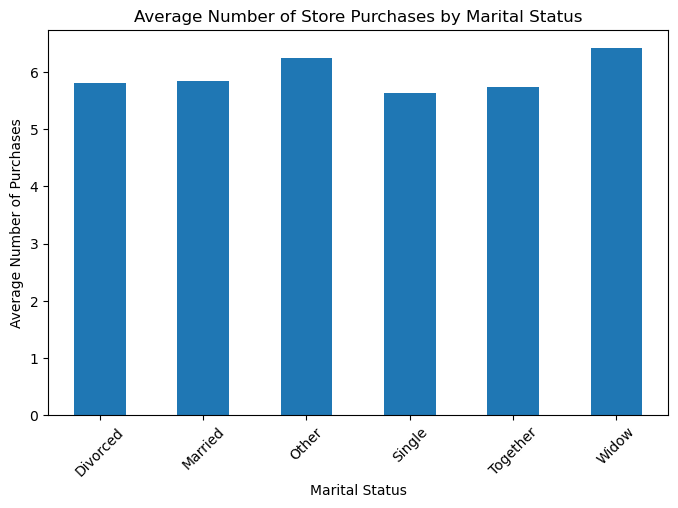

In [221]:
plt.figure(figsize=(8, 5))
df.groupby('Marital_Status')['NumStorePurchases'].mean().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Purchases')
plt.title('Average Number of Store Purchases by Marital Status')
plt.xticks(rotation=45)
plt.show()

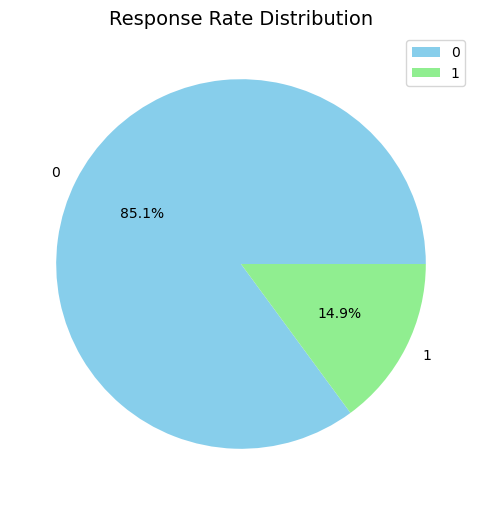

In [222]:
plt.figure(figsize=(6, 6))
df['Response'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Response Rate Distribution', fontsize=14)
plt.ylabel('')
plt.legend()
plt.show()



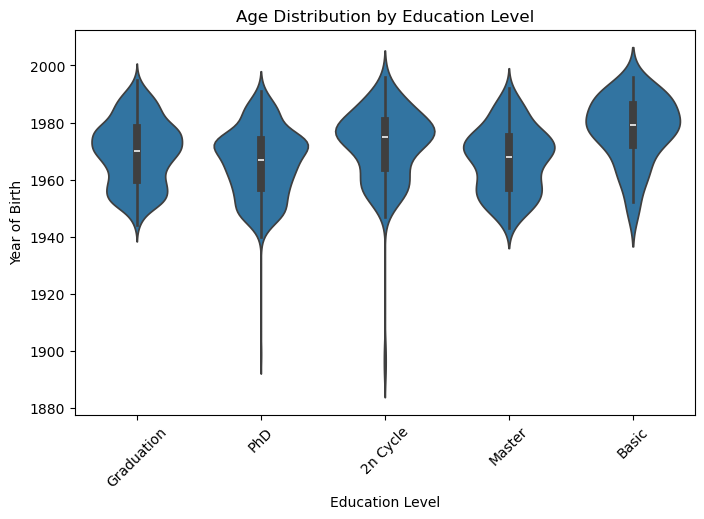

In [223]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Education', y='Year_Birth', data=df)
plt.xlabel('Education Level')
plt.ylabel('Year of Birth')
plt.title('Age Distribution by Education Level')
plt.xticks(rotation=45)
plt.show()

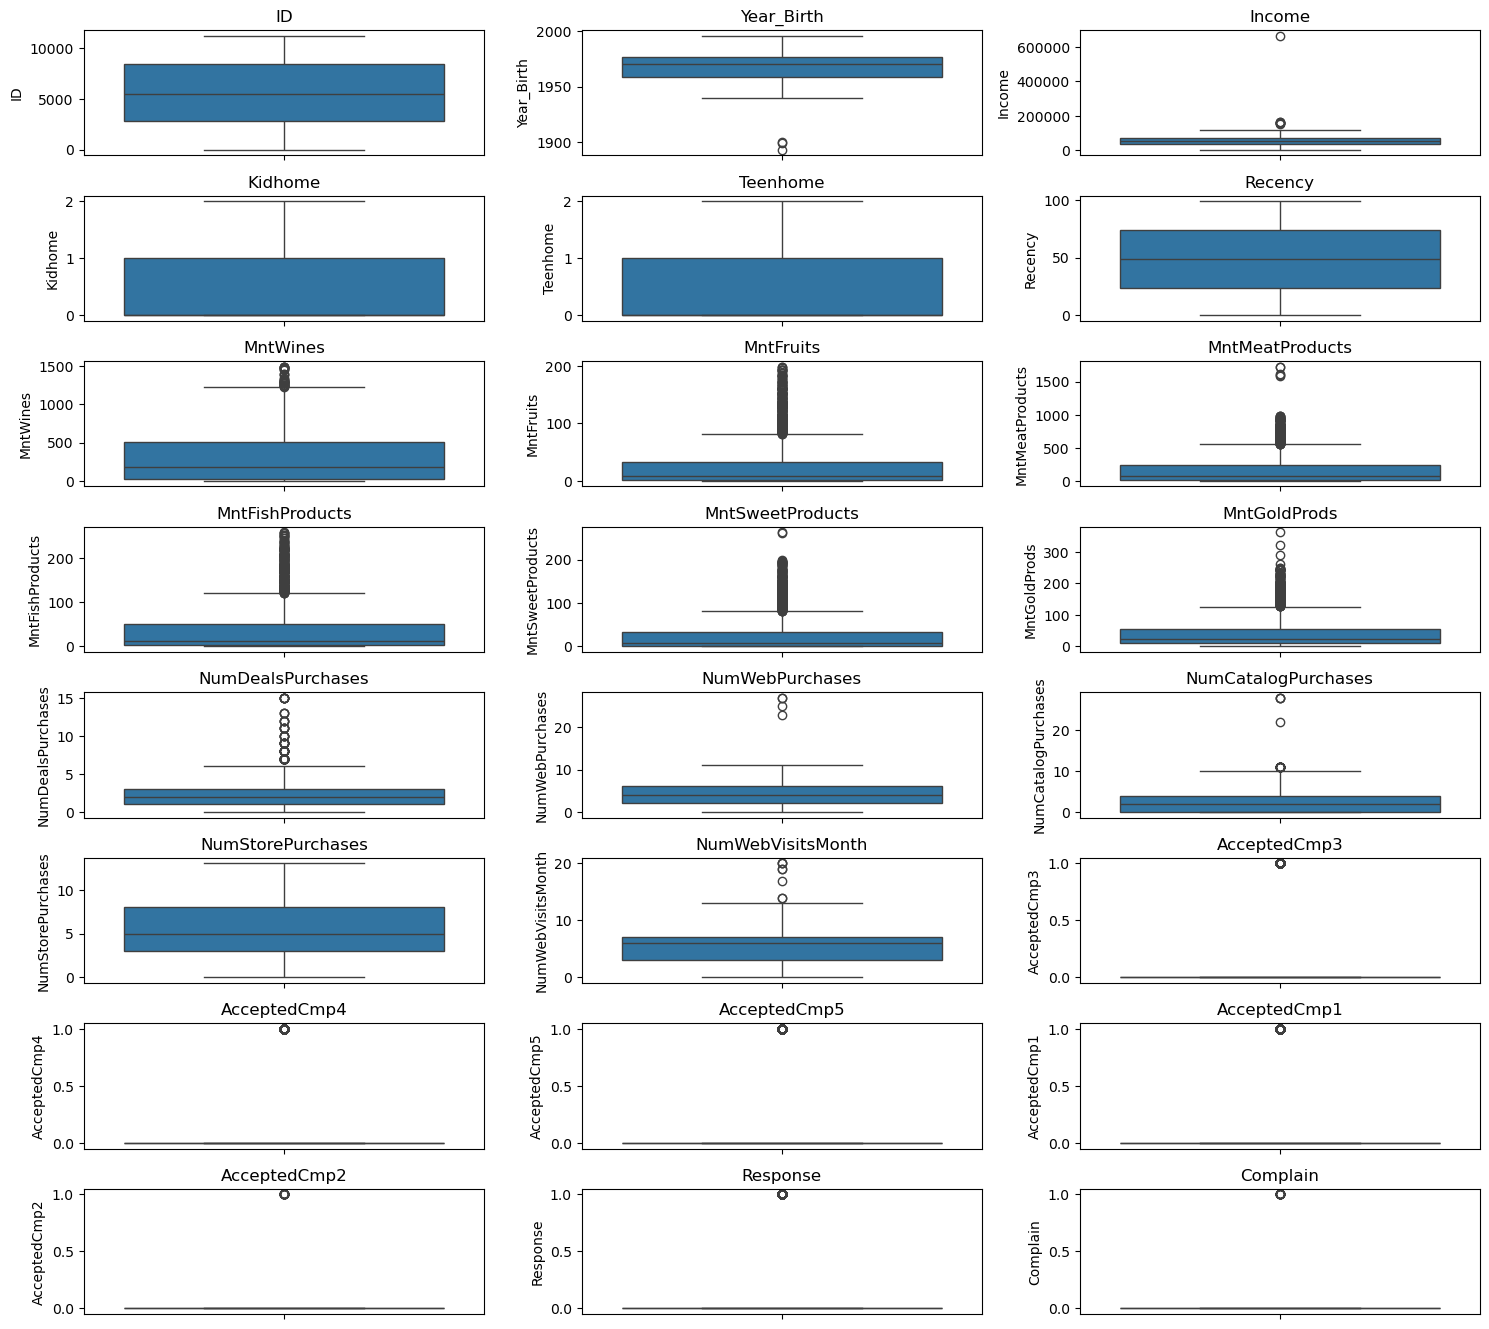

In [225]:
# List of numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for numeric columns
plt.figure(figsize=(15, 15))

# Creating subplots for each numeric feature
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [146]:


# Select features and target variable
features = data.drop(columns=['ID', 'Dt_Customer', 'Response', 'Complain', 'Country'])
target = data['Response']

# Convert categorical variables to dummy variables
features = pd.get_dummies(features, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred = rf_model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)



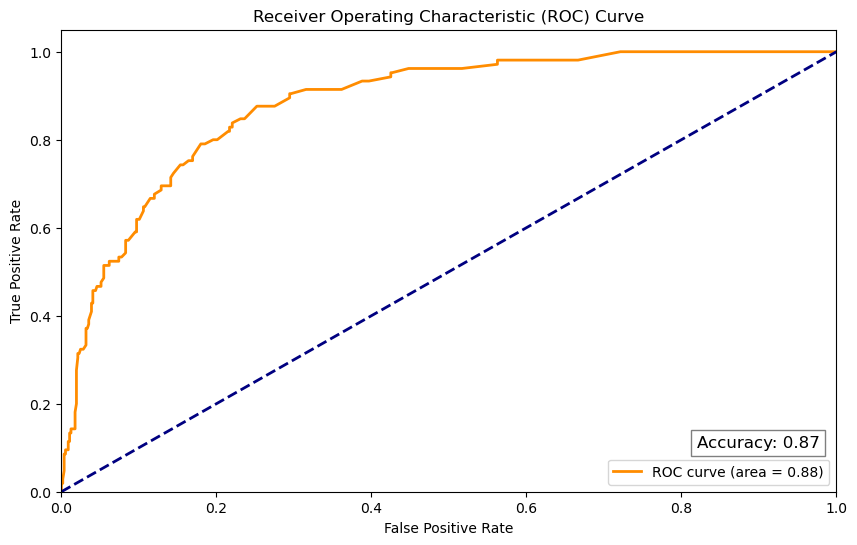

In [147]:
# Plot ROC curve with accuracy
plt.figure(facecolor='white', figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.text(0.82, 0.1, 'Accuracy: %0.2f' % accuracy, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

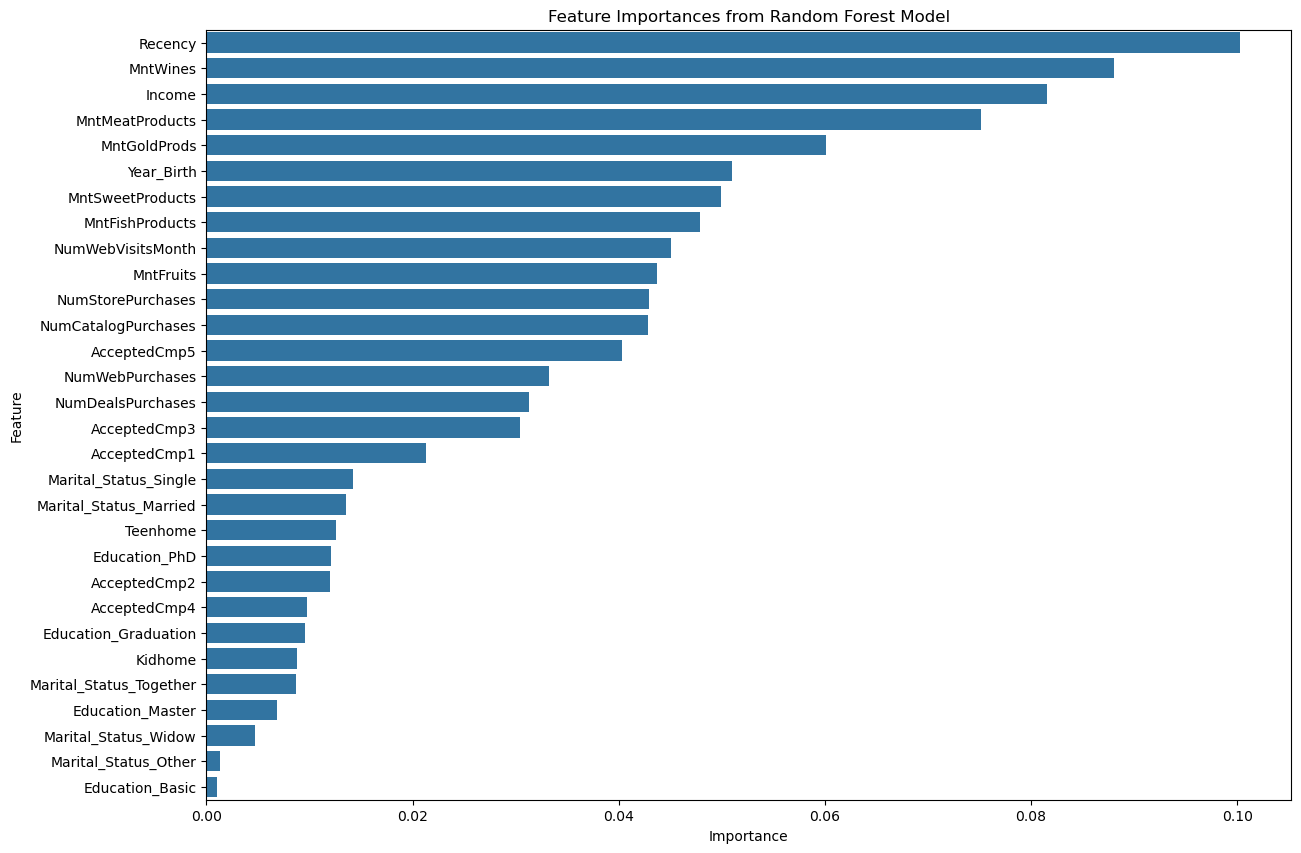

In [149]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(facecolor='white', figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Save the feature importances as an image file
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')

# Show the heatmap
plt.show()

In [152]:
# Function to plot scatter plots for specific pairs of features
def scatter_plot(data, x_feature, y_feature):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=x_feature, y=y_feature)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()

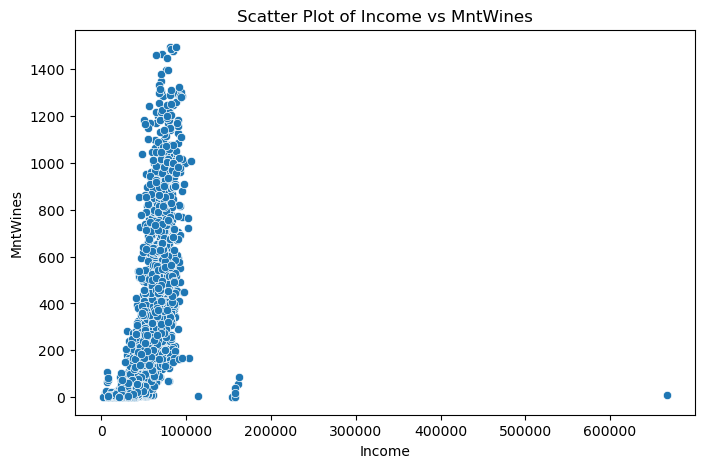

In [153]:
scatter_plot(data, 'Income', 'MntWines')

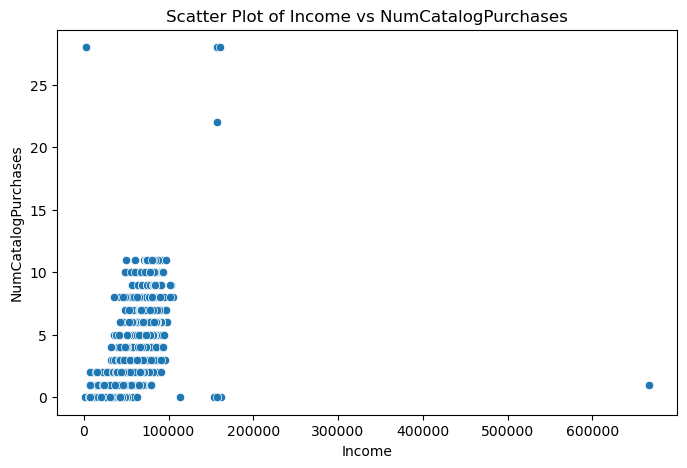

In [155]:
scatter_plot(data, 'Income', 'NumCatalogPurchases')

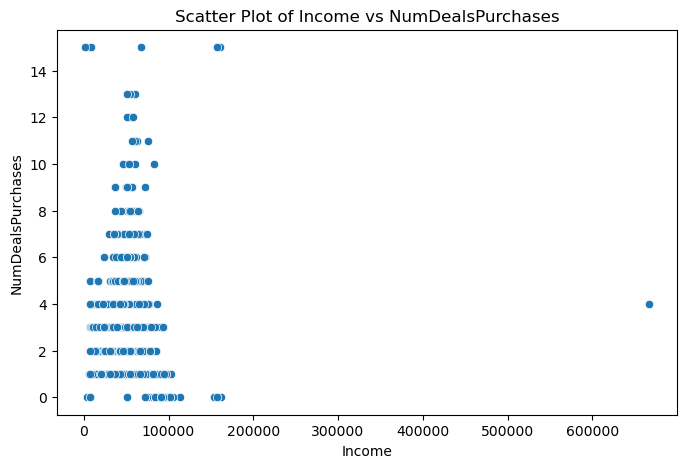

In [157]:
scatter_plot(data, 'Income', 'NumDealsPurchases')

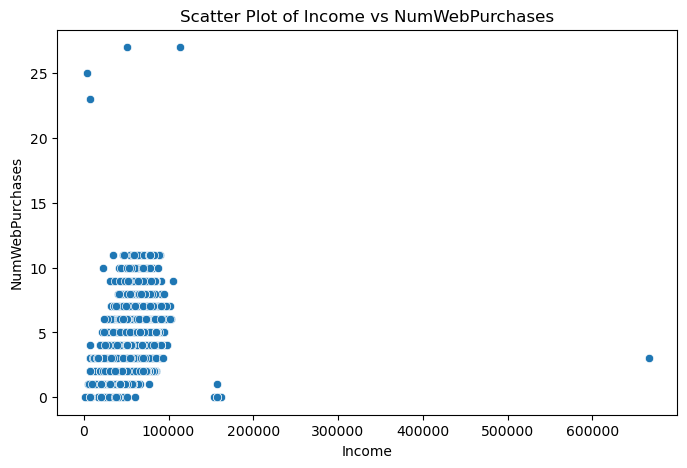

In [159]:
scatter_plot(data, 'Income', 'NumWebPurchases')

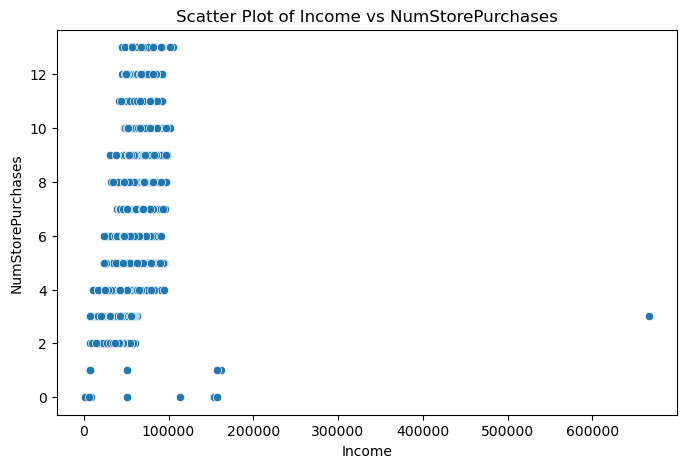

In [160]:
scatter_plot(data, 'Income', 'NumStorePurchases')

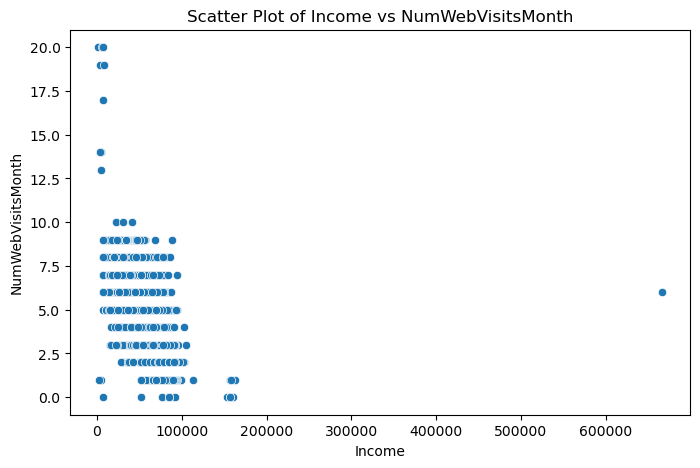

In [161]:
scatter_plot(data, 'Income', 'NumWebVisitsMonth')

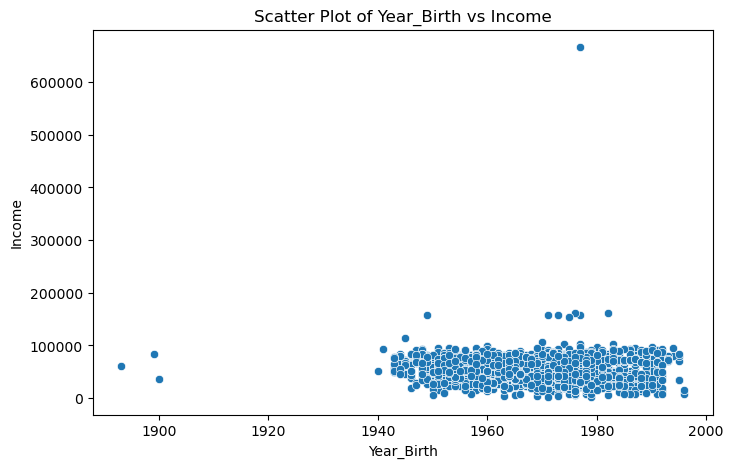

In [163]:
scatter_plot(data, 'Year_Birth', 'Income')

<Axes: >

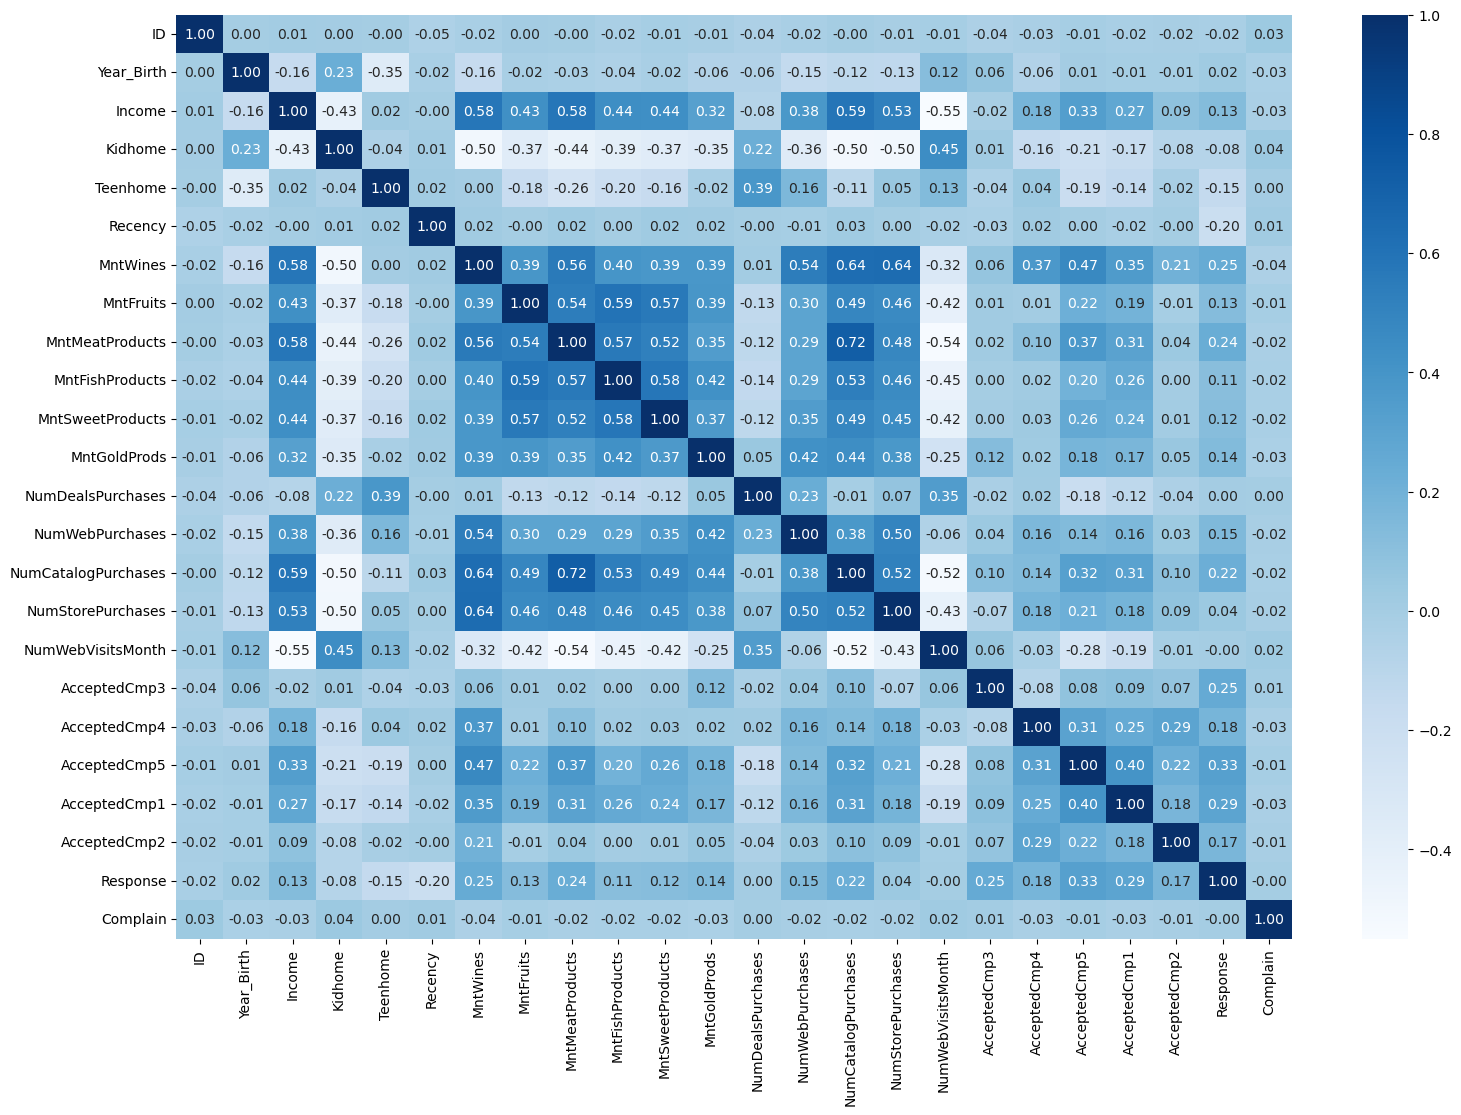

In [164]:
plt.figure(figsize=(18, 12))
sns.heatmap(data=data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues')